In [146]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings ("ignore")

#Paired T test
https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/

https://libguides.library.kent.edu/spss/pairedsamplesttest

https://libguides.library.kent.edu/SPSS/citation 

In [147]:
# load data
df = pd.read_csv ("Sample_Dataset_2014.csv")
df = df[['Math','English']]
print ("Shape of dataset:", df.shape)

Shape of dataset: (435, 2)


In [148]:
# clean data
print ("nan values in columns Math and English:", df['Math'].isna().sum(), df['English'].isna().sum())

df = df[(df.Math != ' ')]
df = df[(df.English != ' ')]
df.reset_index (inplace = True)
df = df.drop ('index', axis=1)
df['Math'] = df['Math'].astype(float)
df['English'] = df['English'].astype(float)
print ("Shape of dataset after preprocessing:", df.shape)
print (df.columns)

for i in range (df.shape[0]):
  if df['Math'][i] == " ":
    print ("Math")
  if df['English'][i] == " ":
    print ("English")

nan values in columns Math and English: 0 0
Shape of dataset after preprocessing: (398, 2)
Index(['Math', 'English'], dtype='object')


In [149]:
print (df.head (5))

    Math  English
0  60.02    88.24
1  70.19    89.45
2  71.20    96.73
3  55.89    74.06
4  65.52    82.61


In [150]:
print ("Mean scores for English vs math:", df['English'].mean (), df['Math'].mean())

Mean scores for English vs math: 82.74409547738692 65.44683417085427


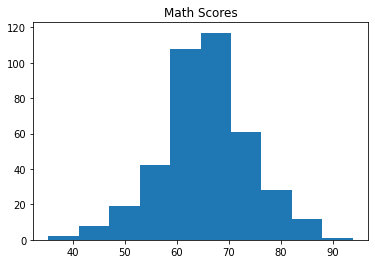

In [151]:
# histogram
x = df['Math']
plt.hist (x)
plt.title ('Math Scores')
plt.show () 
# doesn't look like a normal distribution

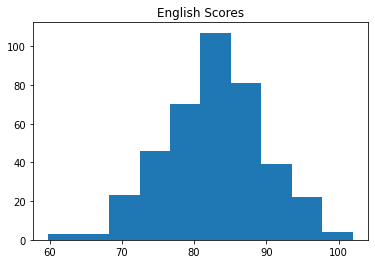

In [152]:
# histogram
x = df['English']
plt.hist (x)
plt.title ('English Scores')
plt.show ()
# doesn't look like a normal distribution

In [153]:
# lets do a statistical test
print ("Math:", stats.shapiro(df['Math']))
print ("English:", stats.shapiro(df['English']))
# p > 0.05 => normal

Math: ShapiroResult(statistic=0.9944291710853577, pvalue=0.15705689787864685)
English: ShapiroResult(statistic=0.9966233968734741, pvalue=0.5731582045555115)


In [154]:
print ("Degree of freedom:", df.shape[0]-1)
print (stats.ttest_rel(df['English'], df['Math']))
# p < 0.05 => means are different

print ("\nThe means for Math and English scores are different.")

Degree of freedom: 397
Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

The means for Math and English scores are different.


#Independent T test
https://www.pythonfordatascience.org/independent-samples-t-test-python/

https://libguides.library.kent.edu/SPSS/IndependentTTest

In [155]:
# load data
df = pd.read_csv ("Sample_Dataset_2014.csv")
df = df[['Athlete','MileMinDur']]
print ("Shape of dataset:", df.shape)
# df[['Athlete','MileMinDur']].describe ()

Shape of dataset: (435, 2)


In [156]:
# clean data
print ("nan values in columns Athlete and MileMinDur:", df['Athlete'].isna().sum(), df['MileMinDur'].isna().sum())

df = df[(df.Athlete != ' ')]
df = df[(df.MileMinDur != ' ')]
df.reset_index (inplace = True)
df = df.drop ('index', axis=1)
# df['Athlete'] = df['Athlete'].astype(float)
# df['English'] = df['English'].astype(float)
print ("Shape of dataset after preprocessing:", df.shape)
print (df.columns)

for i in range (df.shape[0]):
  if df['Athlete'][i] == " ":
    print ("Athlete")
  if df['MileMinDur'][i] == " ":
    print ("MileMinDur")

nan values in columns Athlete and MileMinDur: 0 0
Shape of dataset after preprocessing: (392, 2)
Index(['Athlete', 'MileMinDur'], dtype='object')


In [157]:
non_athelete = df['MileMinDur'][df['Athlete'] == 0]
athelete = df['MileMinDur'][df['Athlete'] == 1]

print (df['Athlete'].value_counts())

0    226
1    166
Name: Athlete, dtype: int64


In [158]:
import datetime
import time
x = time.strptime(df['MileMinDur'][1],'%H:%M:%S')
datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

for i in range (df.shape[0]):
  x = time.strptime(df['MileMinDur'][i],'%H:%M:%S')
  df['MileMinDur'][i] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

In [159]:
print (df.head (5))

   Athlete MileMinDur
0        0      381.0
1        0      420.0
2        0      764.0
3        1      385.0
4        1      444.0


In [160]:
print ("Mean duration (sec/mile) for Athlete vs Non-athlete:", df['MileMinDur'][df['Athlete'] == 1].mean (), df['MileMinDur'][df['Athlete'] == 0].mean())

Mean duration (sec/mile) for Athlete vs Non-athlete: 411.31325301204816 546.1017699115044


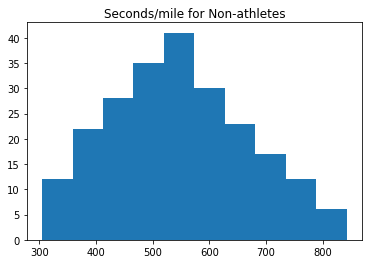

In [161]:
# histogram
x = df['MileMinDur'][df['Athlete'] == 0]
plt.hist (x)
plt.title ('Seconds/mile for Non-athletes')
plt.show () 
# doesn't look like a normal distribution

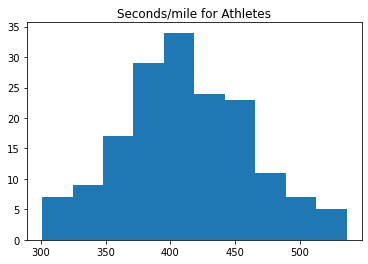

In [162]:
# histogram
x = df['MileMinDur'][df['Athlete'] == 1]
plt.hist (x)
plt.title ('Seconds/mile for Athletes')
plt.show () 
# doesn't look like a normal distribution

In [163]:
# lets do a statistical test
print ("MileMinDur for Non-athlete:", stats.shapiro(df['MileMinDur'][df['Athlete'] == 0]))
print ("MileMinDur for Athlete:", stats.shapiro(df['MileMinDur'][df['Athlete'] == 1]))
# p > 0.05 => normal

MileMinDur for Non-athlete: ShapiroResult(statistic=0.9884744882583618, pvalue=0.06657640635967255)
MileMinDur for Athlete: ShapiroResult(statistic=0.9921348094940186, pvalue=0.5014042258262634)


In [165]:
print ("Degree of freedom:", df.shape[0]-1)
print (stats.ttest_ind(df['MileMinDur'][df['Athlete'] == 0],
                df['MileMinDur'][df['Athlete'] == 1]))

print ("\np value < 0.001, There was a significant difference in mean mile time between non-athletes and athletes.")

Degree of freedom: 391
Ttest_indResult(statistic=13.476224935291887, pvalue=2.992943168109596e-34)

p value < 0.001, There was a significant difference in mean mile time between non-athletes and athletes.
